# PyMC3 Demo 
2022-11-29

## Overview 


## References
- [PyMC3 getting started docs](https://docs.pymc.io/en/v3/pymc-examples/examples/getting_started.html)

In [1]:
from dataclasses import dataclass
from typing import List

import pymc3
import arviz as az
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
@dataclass
class Params: 
    num_rows: int
    alpha: float
    sigma: float    
    beta: List[float]

# set up true parameter values 
p = Params(num_rows=100, alpha=10, sigma=1, beta=[1, 0.3])

In [3]:
seed = 0
np.random.seed(0)

x1 = np.random.randn(p.num_rows)
x2 = np.random.randn(p.num_rows) * 10
x_dict = dict(x1=x1, x2=x2)

underlying_relationship = p.alpha + (p.beta[0] * x1) + (p.beta[1] * x2)

y = underlying_relationship + np.random.normal(scale=p.sigma, size=p.num_rows)
y_no_intercept = y - p.alpha

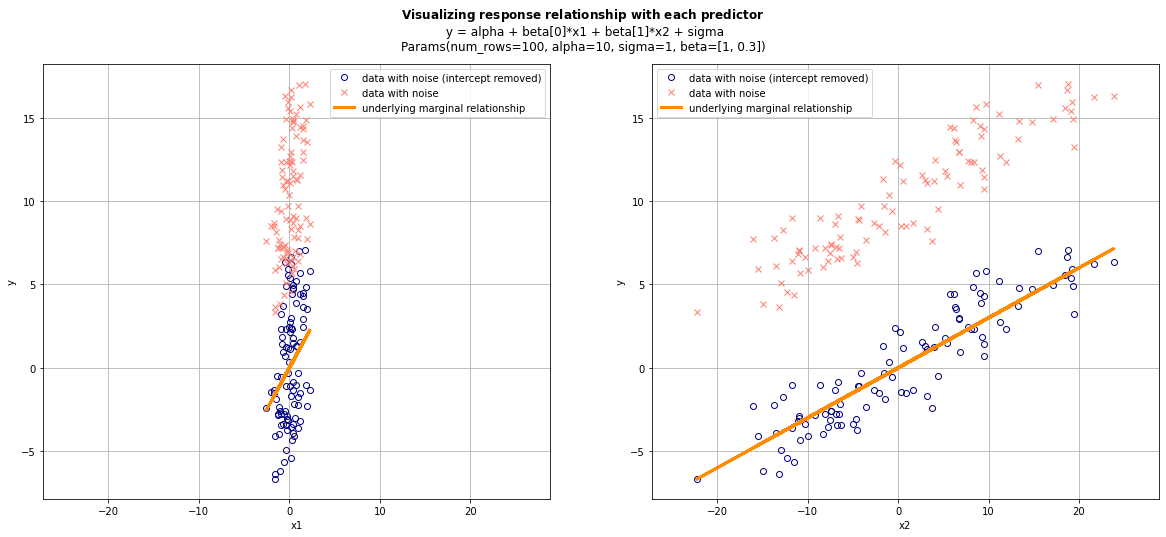

In [4]:
title = r'$\bf{Visualizing \ response \ relationship \ with \ each \ predictor}$'
title += '\n y = alpha + beta[0]*x1 + beta[1]*x2 + sigma'
title += f'\n{p}'
l1 = 'data with noise (intercept removed)'
l2 = 'data with noise'
l3 = 'underlying marginal relationship'
colors = ['navy', 'salmon', 'darkorange']
xlim=(np.min([x1, x2]) - 5 , np.max([x1, x2]) + 5)
fig = plt.figure(figsize=(20, 8))
for idx, tup in enumerate(x_dict.items()): 
    var_name = tup[0]
    values = tup[1]
    ax = plt.subplot(1, 2, idx + 1)
    ax.plot(values, y_no_intercept, "o", mfc='none', color = colors[0], label=l1)
    ax.plot(values, y, "x", mfc='none', color = colors[1], label=l2)
    ax.plot(values, (values * p.beta[idx]), lw=3, color = colors[2], label=l3)
    ax.set_xlabel(var_name)
    ax.set_ylabel('y')
    ax.set_xlim(xlim)
    ax.legend()
    ax.grid(True)
fig.suptitle(title)
fig.show()